# **DAEGU APARTMENT**

Sumber data : [Daegu Apartment](https://www.kaggle.com/code/gunhee/explore-apartment/data) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **1. BUSINESS PROBLEM UNDERSTANDING**

**Context**

Apartemen merupakan salah satu jawaban akan kebutuhan hunian bagi masyarakat modern karena keterbatasan lahan hunian dan padatnya aktivitas bisnis di perkotaan. Oleh karena itu, akan sangat menarik untuk meneliti harga apartemen yang dipengaruhi berbagai faktor internal dan eksternal. Faktor internal antara lain adalah tahun pembangunan (umur bangunan), fasilitas parkir, dan tipe apartemen. Sementara itu, faktor eksternal antara lain jarak ke fasilitas publik, universitas, maupun stasiun terdekat.

Penawaran (unit) apartemen biasa dilakukan oleh perseorangan maupun perusahaan. Para penawar bisa melakukan penjualan unit pada suatu platform dengan menentukan sendiri harga jual apartemen mereka. Hal ini tentu saja cukup menyulitkan bagi pemilik apartemen untuk menyesuaikan dengan harga pasaran. Jika harga terlalu tinggi dibandingkan dengan harga pasaran, tentu akan sulit untuk melakukan penjualan. Sebaliknya, jika terlalu rendah, tentu pemilik akan sulit untuk mendapatkan profit maksimal. 

**Problem Statement**

Permasalahan yang harus dihadapi pemilik apartemen adalah memiliki sebuah model bisnis yang dapat memberikan keuntungan maksimal bagi pemilik apartement sehingga dapat memberikan apartemen yang sesuai dengan harga.

Adanya kebebasan bagi pemilik apartemen untuk menentukan harga jual pada platform penjualan cukup menyulitkan karena kurangnya informasi yang dapat dijadikan petunjuk penentuan harga. Padahal petunjuk tersebut dapat menolong pemilik apartemen untuk menentukan harga yang kompetitif. Oleh karena itu, sangatlah penting untuk menetapkan harga yang kompetitif sesuai dengan fasilitas yang ada.

**Goals**

Berdasarkan permasalahan yang ada, diperlukan sebuah alat yang dapat membantu pemilik apartemen **menentukan harga yang kompetitif bagi apartemen beserta fasilitas yang akan ditawarkan**. Berbagai kelebihan (fitur) yang dimiliki oleh suatu apartemen, seperti jumlah fasilitas, jarak ke fasilitas publik terdekat, dan tipe apartemen dapat meningkatkan keakuratan prediksi harga jual yang paling kompetitaf dan sesuai.

**Analytic Approach**

Diperlukan analisis terhadap data untuk dapat menemukan pattern dari fitur-fitur pembeda satu apartemen dengan apartemen lainnya. Selanjutnya, akan dibangun suatu model regresi yang akan membantu menentukan harga jual apartemen beserta fitur yang berpengaruh pada harga jual.

**Metric Evaluation**

Matriks evalusasi yang nantinya akan digunakan untuk model regresi yang dibangun adalah RMSE.


***
### **2. DATA UNDERSTANDING**

- Dataset merupakan data listing Apartment di Kota Daegu.
- Setiap baris data merepresentasikan informasi terkait properti dan harga.

In [2]:
#Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


**Attributes Information**


| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType  | object | Tipe Apartemen |
| TimeToSubway | object | Jarak Stasiun Terdekat (min)  |
| SubwayStation | object | Nama Stasiun Terdekat |
| N_FacilitiesNearBy(ETC) | float64 | Jumlah Fasilitas Terdekat |
| N_FacilitiesNearBy(Public Office) | float64 | Jumlah Kantor Pemerintah Terdekat |
| N_SchoolNearBy(University) | float64 | Jumlah Universitas Terdekat |
| N_Parkinglot(Basement) | float64 | Jumlah (Basemen) Lahan Parkir |
| YearBuilt | int64 | Tahun Pembangunan |
| N_FacilitiesInApt | int64 | Jumlah Fasilitas Apartment |
| Size(sqf) | int64 | Luas Apartment |
| SalePrice | int64 | Harga Jual Apartment (Won) |

<br>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


#### **Exploratory Data Analysis**

**Distribution of Daegu Apartment price**

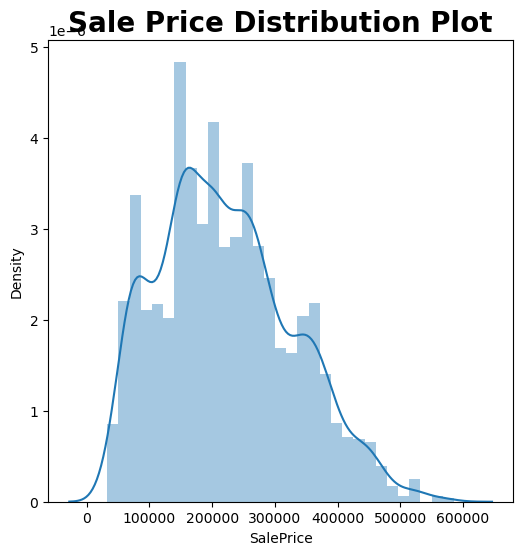

In [5]:
#distribution plot dari fitur 'SalePrice'
plt.figure(figsize=(6,6))
sns.distplot(df['SalePrice'])
plt.title('Sale Price Distribution Plot', size=20, weight='bold')
plt.show()

Berdasarkan distribution plot SellPrice atau harga jual apartemen tersebut, dapat terlihat bahwa terjadi 'right-skewness' atau skewness positif pada fitur tersebut.

#### **HallwayTypes related to SellPrice**

In [6]:
#cek jumlah apartemen berdasarkan HallwayType dan SubwayStation terdekat
print(f"Jumlah apartemen berdasarkan HallwayType:\n{df['HallwayType'].value_counts()}")
print(f"\nJumlah apartemen berdasarkan SubwayStation:\n{df['SubwayStation'].value_counts()}")

Jumlah apartemen berdasarkan HallwayType:
terraced    2528
mixed       1131
corridor     464
Name: HallwayType, dtype: int64

Jumlah apartemen berdasarkan SubwayStation:
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: SubwayStation, dtype: int64


Dapat dilihat bahwa mayoritas apartemen yang dijual memiliki HallwayType terrace dan mixed, serta mayoritas berlokasi dekat dengan SubwayStation Kyungbuk_uni_hospital dan Myung-duk.

In [7]:
#grouping SubwayStation terdekat berdasarkan HallwayTipe
df.groupby(['SubwayStation','HallwayType'])['HallwayType'].count()

SubwayStation          HallwayType
Bangoge                mixed           502
Banwoldang             corridor         50
                       terraced        479
Chil-sung-market       mixed            74
Daegu                  corridor         51
                       terraced         14
Kyungbuk_uni_hospital  corridor         49
                       terraced       1103
Myung-duk              corridor        222
                       mixed           555
                       terraced        267
Sin-nam                corridor         51
                       terraced        416
no_subway_nearby       corridor         41
                       terraced        249
Name: HallwayType, dtype: int64

In [8]:
#grouping SubwayStation terdekat berdasarkan HallwayTipe
df.groupby(['YearBuilt','SubwayStation'])['SubwayStation'].count()

YearBuilt  SubwayStation        
1978       Kyungbuk_uni_hospital     49
1980       Myung-duk                  4
1985       Daegu                     51
1986       Kyungbuk_uni_hospital    222
           Sin-nam                   51
1992       Myung-duk                326
1993       Myung-duk                451
1997       Chil-sung-market          67
2003       Chil-sung-market           7
2005       Bangoge                  502
2006       Kyungbuk_uni_hospital    139
           Myung-duk                108
           Sin-nam                  213
2007       Banwoldang               433
           Kyungbuk_uni_hospital    420
2008       Sin-nam                  203
2009       no_subway_nearby         171
2013       Kyungbuk_uni_hospital    322
2014       Banwoldang                96
           Myung-duk                155
           no_subway_nearby          41
2015       Daegu                     14
           no_subway_nearby          78
Name: SubwayStation, dtype: int64

In [9]:
#grouping SubwayStation terdekat berdasarkan HallwayTipe dan YearBuilt
df.groupby(['SubwayStation','YearBuilt','HallwayType'])['HallwayType'].count()

SubwayStation          YearBuilt  HallwayType
Bangoge                2005       mixed          502
Banwoldang             2007       terraced       433
                       2014       corridor        50
                                  terraced        46
Chil-sung-market       1997       mixed           67
                       2003       mixed            7
Daegu                  1985       corridor        51
                       2015       terraced        14
Kyungbuk_uni_hospital  1978       corridor        49
                       1986       terraced       222
                       2006       terraced       139
                       2007       terraced       420
                       2013       terraced       322
Myung-duk              1980       terraced         4
                       1992       corridor       222
                                  mixed          104
                       1993       mixed          451
                       2006       terraced       108


In [10]:
#cek median SalePice untuk setiap SubwayStation
df_med_saleprice = df.groupby(by=['SubwayStation']).agg({'SalePrice':'median'}).reset_index()
df_med_saleprice = df_med_saleprice.set_index('SubwayStation')
df_med_saleprice = df_med_saleprice.sort_values('SalePrice', ascending =False)
df_med_saleprice.head()

,SalePrice
SubwayStation,
Banwoldang,315929.0
Sin-nam,247787.0
Kyungbuk_uni_hospital,238938.0
no_subway_nearby,207743.0
Bangoge,167035.0


In [11]:
#plot SalePrice median untuk setiap HallwayType apartemen di setiap SubwayStation
from IPython.display import display

neighbour_pivot = df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')
display(neighbour_pivot)

HallwayType,corridor,mixed,terraced
SubwayStation,,,
Bangoge,NaN,167035.0,NaN
Banwoldang,101769.0,NaN,337168.0
Chil-sung-market,NaN,88495.0,NaN
Daegu,70796.0,NaN,300884.0
Kyungbuk_uni_hospital,163716.0,NaN,244911.0
Myung-duk,65486.0,149557.0,271681.0
Sin-nam,87610.0,NaN,256637.0
no_subway_nearby,58407.0,NaN,243362.0


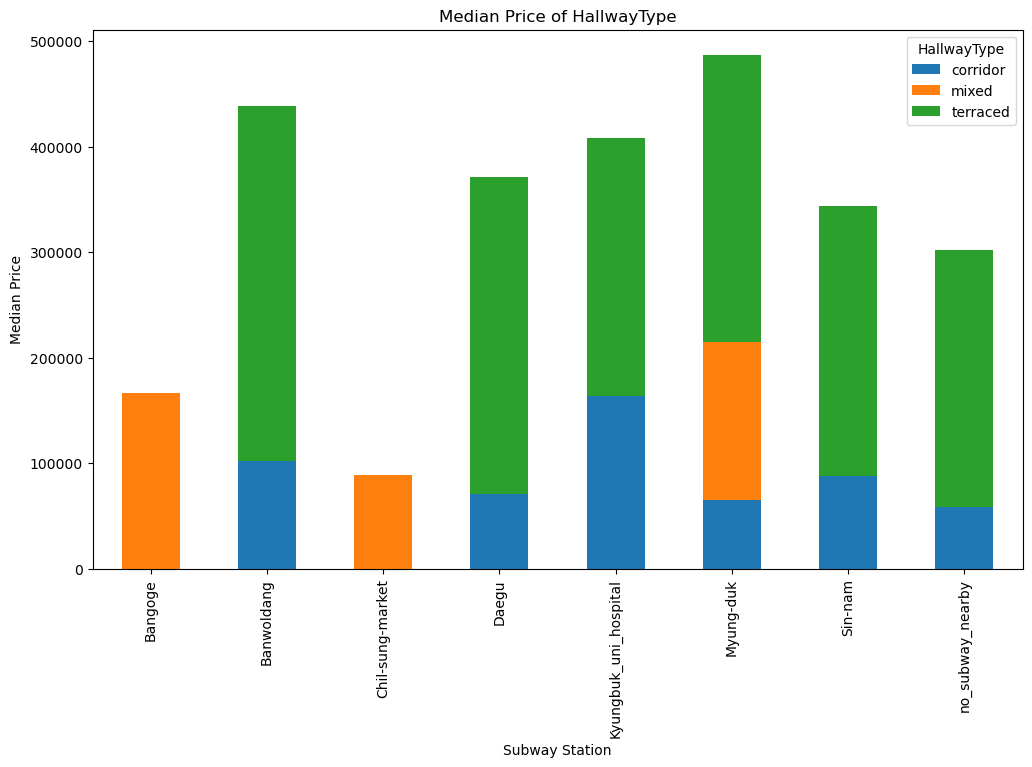

In [12]:
pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Subway Station')
pivot_plot.set_ylabel('Median Price')
pivot_plot.set_title('Median Price of HallwayType')
plt.show()

Harga jual (SalePrice) median tertinggi untuk setiap HallwayType berada di SubwayStation yang sangat bervariasi. Apartemen di sekitar SubwayStation Kyungbuk_uni_hospital memiliki nilai median tertinggi pada HallwayType corridor, Bangoge untuk HallwayType mixed, dan Banwoldang untuk HallwayType terraced.

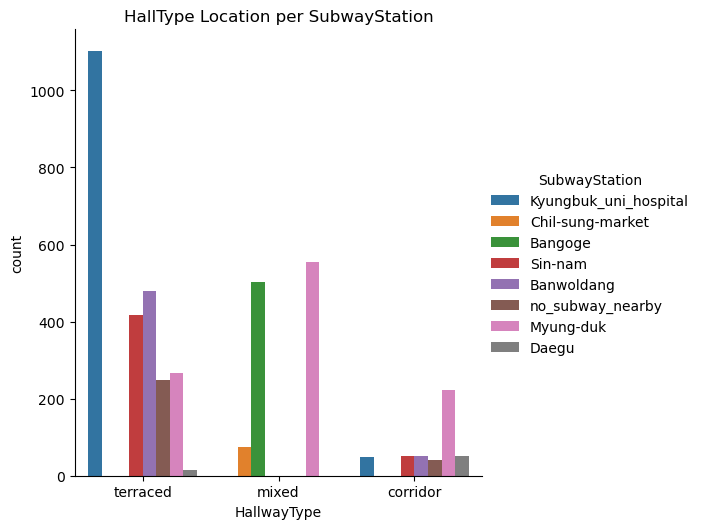

In [13]:
#persebaran HallwayType berdasarkan lokasi SubwayStation
sns.catplot(x='HallwayType', kind='count', hue='SubwayStation', data=df);
plt.title('HallType Location per SubwayStation')
plt.show()

Mayoritas HallwayType adalah terraced dan berlokasi di sekitar SubwayStation bernama Kyungbuk_uni_hospital. Sementara itu, mayoritas HallwayType mixed berlokasi di Myungduk. Hal ini memperlihatkan indikasi pilihan pembeli yang lebih memilih HallwayType terraced dan mixed daripada corridor.

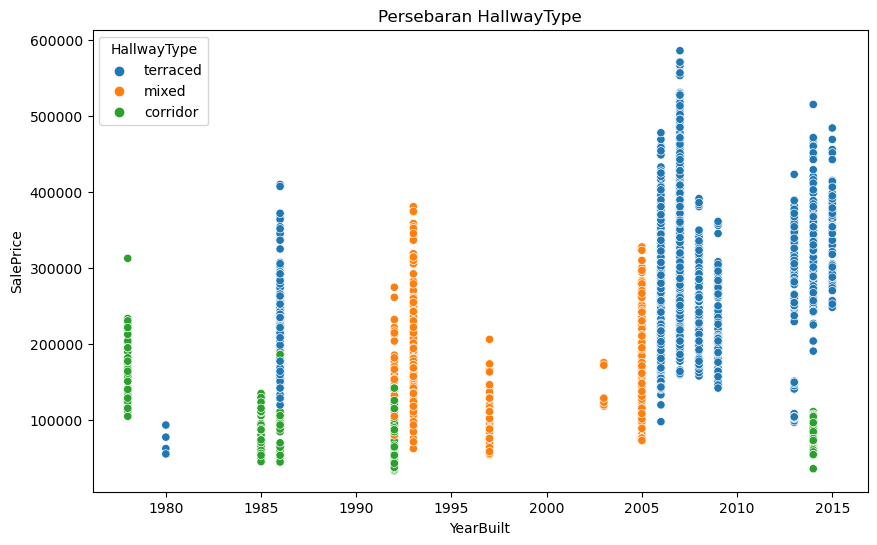

In [14]:
# Plot persebaran HallwayType 
plt.figure(figsize=(10,6))
sns.scatterplot(df['YearBuilt'], df['SalePrice'], hue=df['HallwayType']).set_title('Persebaran HallwayType')
plt.show()

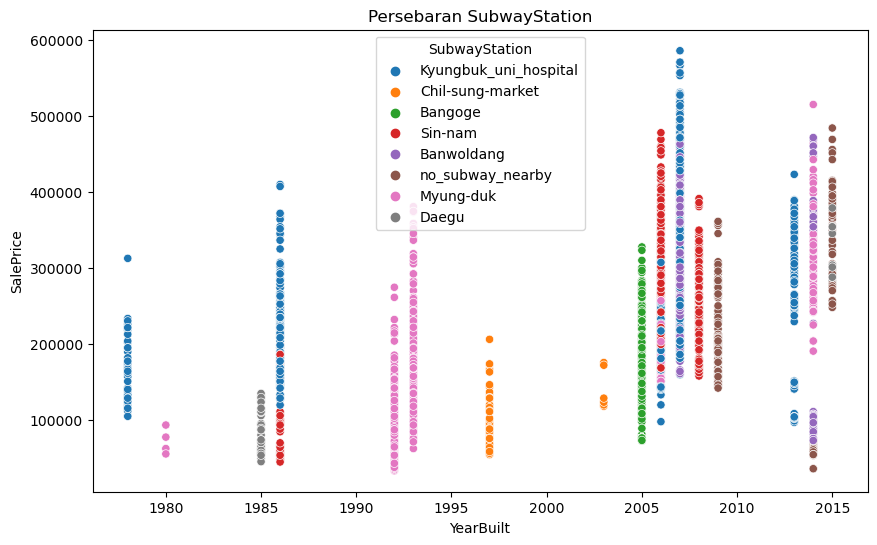

In [15]:
#Plot persebaran SubwayStation
plt.figure(figsize=(10,6))
sns.scatterplot(df['YearBuilt'], df['SalePrice'], hue=df['SubwayStation']).set_title('Persebaran SubwayStation')
plt.show()

***

### **3. Data Preprocessing**

#### **DATA CLEANING**

Tahap ini akan dilakukan cleaning pada data yang kemudian akan digunakan untuk analisis selanjutnya. Dalam tahap ini akan dilakukan beberapa langkah, antara lain :
- Drop fitur yang kurang relevan dengan permasalahan
- Penanganan missing value
- Penanganan duplicate values

Untuk proses ini dan selanjutnya, akan digunakan dataframe hasil duplikasi dari dataframe yang ada.

In [16]:
#Duplikasi dataframe
df_model = df.copy()

In [17]:
#cek info lebih detail untuk setiap fitur
listItem=[]

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(3).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[mixed, corridor, terraced]"
1,TimeToSubway,object,0,0.0,5,"[10min~15min, 5min~10min, 0-5min]"
2,SubwayStation,object,0,0.0,8,"[Banwoldang, Kyungbuk_uni_hospital, Myung-duk]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[1.0, 0.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[0.0, 1.0, 4.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[5.0, 3.0, 4.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[218.0, 181.0, 475.0]"
7,YearBuilt,int64,0,0.0,16,"[2003, 2008, 1978]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[2, 10, 1]"
9,Size(sqf),int64,0,0.0,89,"[857, 426, 1419]"


#### **Missing Value**

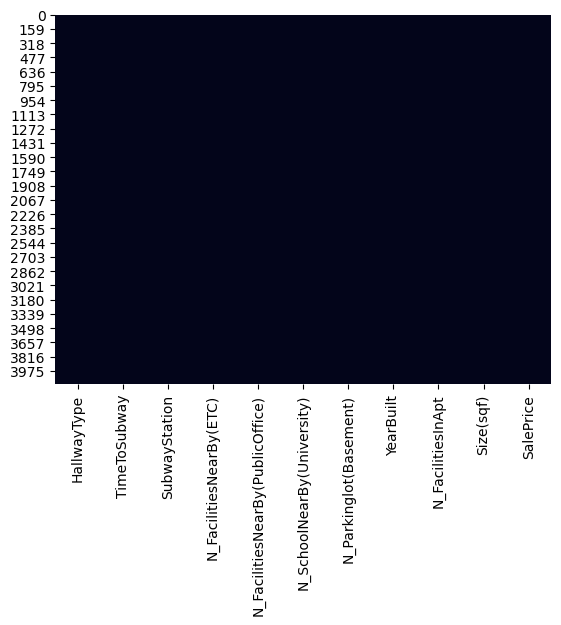

In [18]:
#Cek missing value
sns.heatmap(df_model.isnull(), cbar=False)
plt.show()

Tidak terlihat adanya missing value pada visualisasi heatmap. Lakukan double check dengan menampilkan jumlah missing value.

In [19]:
df_model.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [20]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

Ternyata benar bahwa tidak terdapat missing value pada dataset. Oleh karena itu, tidak perlu dilakukan penanganan khusus untuk pengisian missing value ataupun drop fitur tertentu.


#### **Duplicate Data**

Selanjutnya, dilakukan pula pengecekan record data yang memiliki value duplikat untuk setiap fiturnya.

In [21]:
#Cek duplikasi data
df_model.duplicated().sum()
dup = df_model[df_model.duplicated()]
dup

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


Pada pengecekan tersebut, ditemukan 1422 record data yang memiliki value duplikat pada kesebelas fitur.

Oleh karena itu, dilakukan drop value duplikat dengan tetap meninggalkan satu record value paling pertama.

In [22]:
df_model.drop_duplicates(keep='first', inplace=True)

In [23]:
df_model.duplicated().sum()

0

Setelah dilakukan pengecekan ulang, dapat dilihat bahwa tidak ditemukan lagi record value yang duplikat.



In [24]:
#cek dataset info
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2701 non-null   object 
 1   TimeToSubway                      2701 non-null   object 
 2   SubwayStation                     2701 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64
 5   N_SchoolNearBy(University)        2701 non-null   float64
 6   N_Parkinglot(Basement)            2701 non-null   float64
 7   YearBuilt                         2701 non-null   int64  
 8   N_FacilitiesInApt                 2701 non-null   int64  
 9   Size(sqf)                         2701 non-null   int64  
 10  SalePrice                         2701 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 253.2+ KB


In [25]:
#mengubah tipe data seluruh N_FacilitiesNearBy dan N_Parkinglot(Basement) menjadi int
df_model['N_FacilitiesNearBy(ETC)'] = df_model['N_FacilitiesNearBy(ETC)'].astype(np.int64)
df_model['N_FacilitiesNearBy(PublicOffice)'] = df_model['N_FacilitiesNearBy(PublicOffice)'].astype(np.int64)
df_model['N_SchoolNearBy(University)'] = df_model['N_SchoolNearBy(University)'].astype(np.int64)
df_model['N_Parkinglot(Basement)'] = df_model['N_Parkinglot(Basement)'].astype(np.int64)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   SubwayStation                     2701 non-null   object
 3   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 5   N_SchoolNearBy(University)        2701 non-null   int64 
 6   N_Parkinglot(Basement)            2701 non-null   int64 
 7   YearBuilt                         2701 non-null   int64 
 8   N_FacilitiesInApt                 2701 non-null   int64 
 9   Size(sqf)                         2701 non-null   int64 
 10  SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 253.2+ KB


In [26]:
#cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790
std,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [27]:
#cek YearBuilt yang < 2000
df_model[df_model['YearBuilt'] < 2000]['YearBuilt'].count()

858

In [28]:
#drop data dengan YearBuilt < 2000
# df_model = df_model[(df_model['YearBuilt'] < 2000)

In [29]:
#cek ulang data info
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   SubwayStation                     2701 non-null   object
 3   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 5   N_SchoolNearBy(University)        2701 non-null   int64 
 6   N_Parkinglot(Basement)            2701 non-null   int64 
 7   YearBuilt                         2701 non-null   int64 
 8   N_FacilitiesInApt                 2701 non-null   int64 
 9   Size(sqf)                         2701 non-null   int64 
 10  SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 253.2+ KB


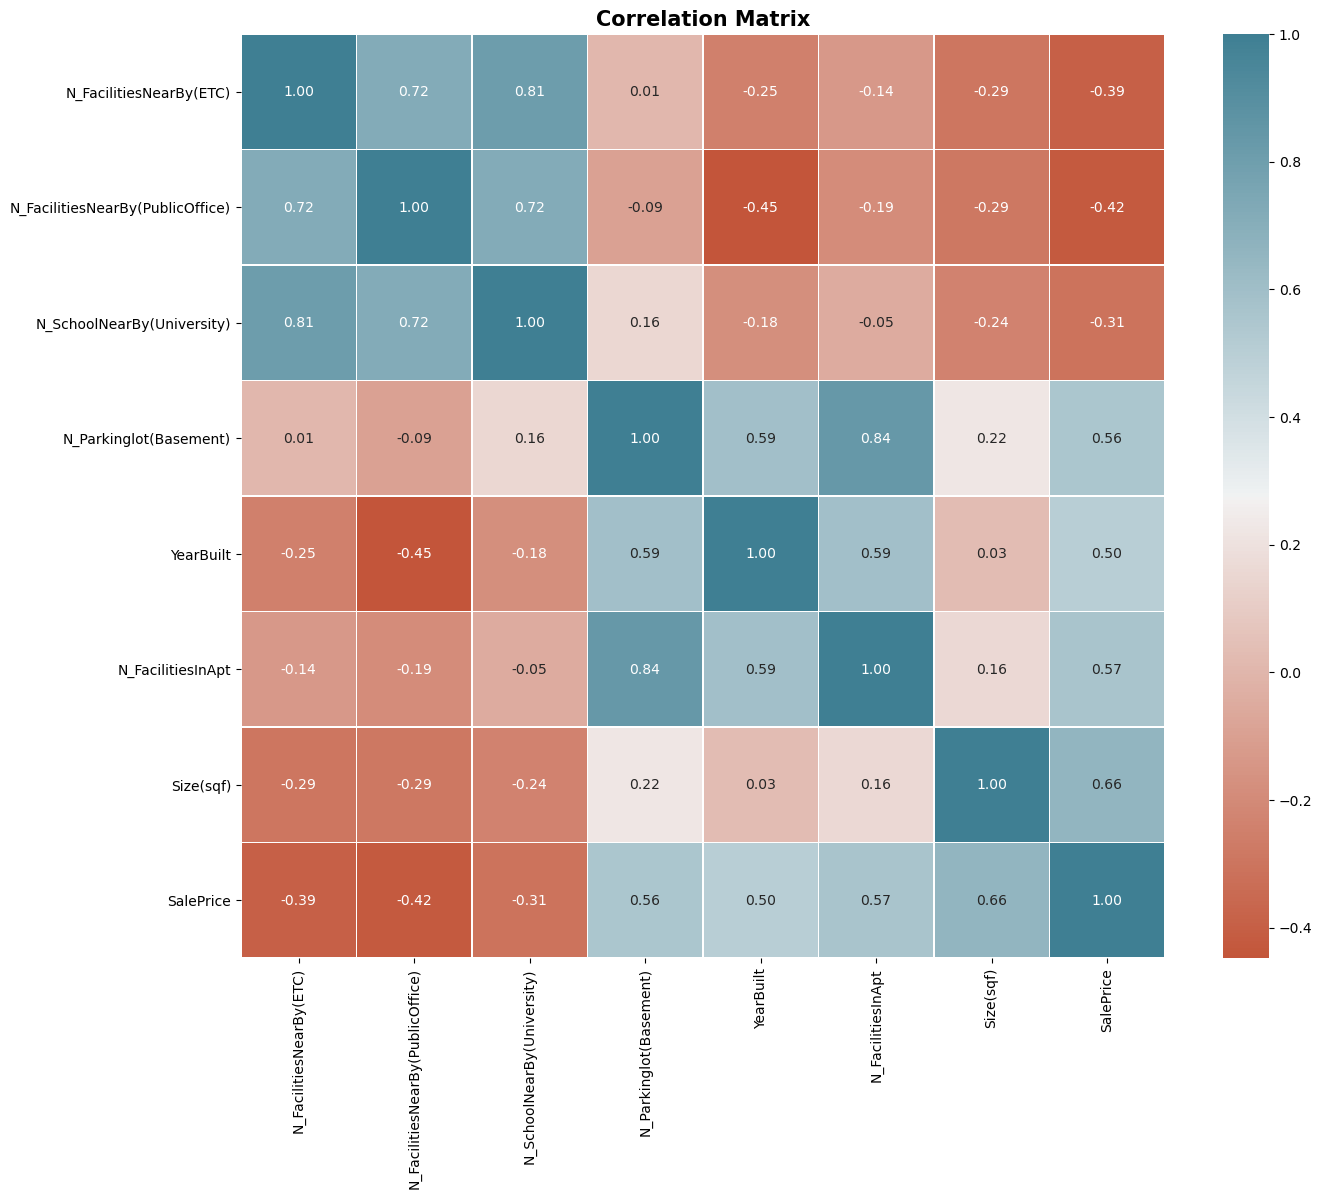

In [30]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Correlation matrix menunjukkkan bahwa fitur N_Parkinglot(Basement), N_FacilitienInApt dan Size(sqf) memiliki korelasi yang kuat terhadap fitur SalePrice. Korelasi paling tinggi dimiliki oleh fitur Size(sqf) sebesar 0.66 (large positive value) yang menunjukkan bahwa SalePrice meningkat seiring dengan kenaikan Size(sqf). Korelasi tertinggi selanjutnya diikuti oleh N_Parkinglot(Basement) dan N_FacilitiesApt sebesar 0.56 dan 0.57.

Sementara itu, fitur N_FacilitiesNearBy(PublicOffice) memiliki nilai -0.42 terhadap SalePrice. Hal ini memiliki arti bahwa SalePrice akan meningkat seiring dengan menurunnya jumlah N_FacilitiesNearBy(PublicOffice).

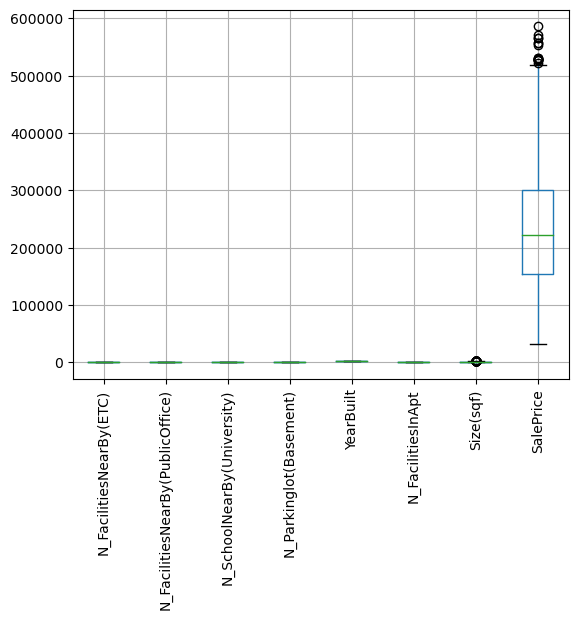

In [31]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90)
plt.show()

In [32]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')      

In [33]:
# Outliers pada fitur SalePrice
find_anomalies(df_model['SalePrice'])

IQR: 147345.0
limit_bawah: -67478.5
limit_atas: 521901.5


In [34]:
# Outliers pada fitur Size(sqf)
find_anomalies(df_model['Size(sqf)'])

IQR: 424.0
limit_bawah: 107.0
limit_atas: 1803.0


In [35]:
# Outliers pada fitur N_FacilitiesInApt
find_anomalies(df_model['N_FacilitiesInApt'])

IQR: 3.0
limit_bawah: -0.5
limit_atas: 11.5


In [36]:
# Outliers pada fitur N_Parkinglot(Basement)
find_anomalies(df_model['N_Parkinglot(Basement)'])

IQR: 617.0
limit_bawah: -744.5
limit_atas: 1723.5


#### **FEATURE ENGINEERING**

Selanjutnya, dapat dilakukan feature engineering terhadap fitur-fitur numerikal.

**A. SalePrice**

In [37]:
#cek deskriptif statistik kolom SalePrice
df_model['SalePrice'].describe()

count      2701.000000
mean     229511.365790
std      105079.891321
min       32743.000000
25%      153539.000000
50%      221238.000000
75%      300884.000000
max      585840.000000
Name: SalePrice, dtype: float64

In [38]:
#cek SalePrice > 521901.5
df_model[df_model['SalePrice'] > 521901.5].count()['SalePrice']

17

Terlihat bahwa 75% data pada kolom SalePrice bernilai kurang dari 300884.000000, sedangkan nilai maksimalnya adalah 585840.000000. Dengan demikian, terdapat positive skewness pada distribusi nilai yang sedikit memanjang di sebelah kanan. 

Terdapat 17 data yang memiliki value SalePrice lebih dari 521901.5 (limit atas Metode IQR). Oleh karea itu, untuk mengurangi skewness akan dilakukan penghapusan data yang memiliki value lebih dari limit atas Metode IQR ke dalam pemodelan.

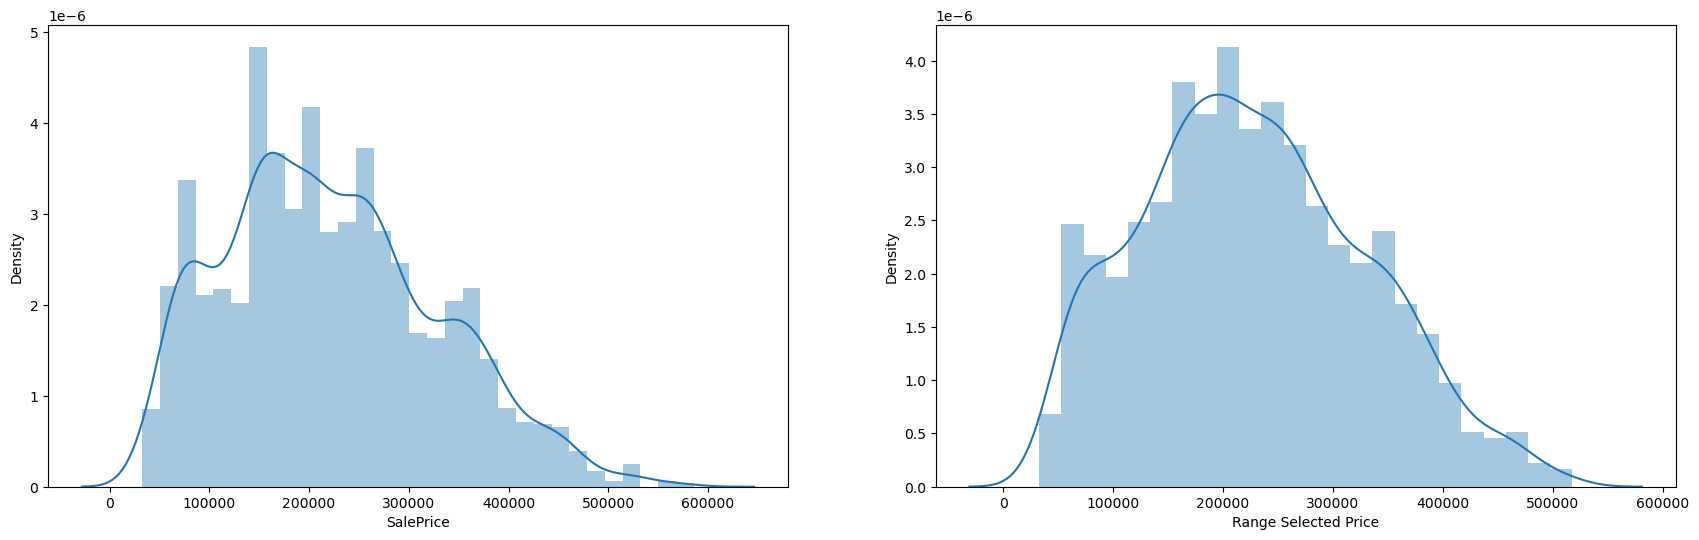

In [39]:
#melakukan filtering pada data
df_model = df_model[(df_model['SalePrice'] <= 521901.5)]

#plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['SalePrice'], ax=axes[0])
sns.distplot(df_model['SalePrice'], ax=axes[1])
axes[0].set_xlabel('SalePrice')
axes[1].set_xlabel('Range Selected Price');
plt.show()

In [40]:
#cek deskriptif statistika kolom SalePrice setelah filtering
df_model['SalePrice'].describe()

count      2684.000000
mean     227524.476528
std      102380.847211
min       32743.000000
25%      153097.000000
50%      220088.000000
75%      297455.500000
max      517699.000000
Name: SalePrice, dtype: float64

**B. Size(sqf)**

Batas atas berdasarkan Metode IQR untuk fitur Size(sqf) adalah 1803.0.

In [41]:
#cek deskriptif statistik fitur Size(sqf)
df_model['Size(sqf)'].describe()

count    2684.000000
mean      978.779434
std       387.404559
min       135.000000
25%       743.000000
50%       910.000000
75%      1167.000000
max      2337.000000
Name: Size(sqf), dtype: float64

In [42]:
#cek jumlah value Size(sqf) > 1803.0
df_model[df_model['Size(sqf)'] > 1803.0].count()['Size(sqf)']

73

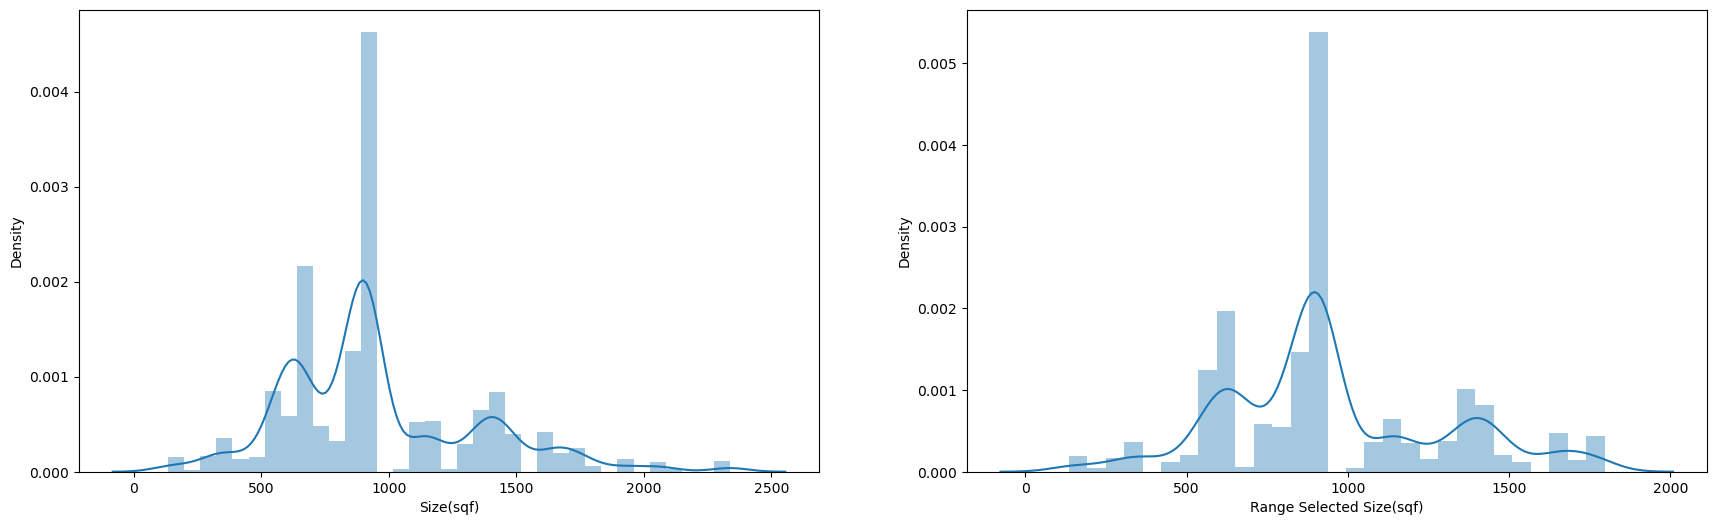

In [43]:
#melakukan filtering pada data Size(sqf) tidak lebih dari 1803.0
df_model = df_model[df_model['Size(sqf)'] <= 1803.0]

#plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Size(sqf)'], ax=axes[0])
sns.distplot(df_model['Size(sqf)'], ax=axes[1])
axes[0].set_xlabel('Size(sqf)')
axes[1].set_xlabel('Range Selected Size(sqf)');
plt.show()

**C. N_FacilitiesInApt**

In [44]:
#cek deskriptif statistik fitur Size(sqf)
df_model['N_FacilitiesInApt'].describe()

count    2611.000000
mean        5.683263
std         2.367327
min         1.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: N_FacilitiesInApt, dtype: float64

In [45]:
#cek jumlah value N_FacilitiesInApt > 11.5
df_model[df_model['N_FacilitiesInApt'] > 11.5].count()['N_FacilitiesInApt']

0

**D. N_Parkinglot(Basement)**

In [46]:
#cek deskriptif statistik fitur Size(sqf)
df_model['N_Parkinglot(Basement)'].describe()

count    2611.000000
mean      525.471850
std       415.611063
min         0.000000
25%       181.000000
50%       536.000000
75%       798.000000
max      1321.000000
Name: N_Parkinglot(Basement), dtype: float64

In [47]:
#cek jumlah value N_Parkinglot(Basement) > 1723.5
df_model[df_model['N_Parkinglot(Basement)'] > 1723.5].count()['N_Parkinglot(Basement)']

0

Terdapat 0 data yang memiliki value N_FacilitiesInApt > 11.5 dan N_Parkinglot(Basement) > 1723.5 (limit atas Metode IQR) yang berarti fitur N_FacilitiesInApt dan N_Parkinglot(Basement) tidak memiliki andil dalam skewness.

#### **DROP COLUMN - CLEAN DATA SET**

In [48]:
#cek dataset yang sudah bersih
df_model.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504


In [49]:
#cek lagi info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2611 non-null   object
 1   TimeToSubway                      2611 non-null   object
 2   SubwayStation                     2611 non-null   object
 3   N_FacilitiesNearBy(ETC)           2611 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2611 non-null   int64 
 5   N_SchoolNearBy(University)        2611 non-null   int64 
 6   N_Parkinglot(Basement)            2611 non-null   int64 
 7   YearBuilt                         2611 non-null   int64 
 8   N_FacilitiesInApt                 2611 non-null   int64 
 9   Size(sqf)                         2611 non-null   int64 
 10  SalePrice                         2611 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 244.8+ KB


In [50]:
df_model = df_model.drop(columns=['TimeToSubway'])

In [51]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611 entries, 0 to 4121
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2611 non-null   object
 1   SubwayStation                     2611 non-null   object
 2   N_FacilitiesNearBy(ETC)           2611 non-null   int64 
 3   N_FacilitiesNearBy(PublicOffice)  2611 non-null   int64 
 4   N_SchoolNearBy(University)        2611 non-null   int64 
 5   N_Parkinglot(Basement)            2611 non-null   int64 
 6   YearBuilt                         2611 non-null   int64 
 7   N_FacilitiesInApt                 2611 non-null   int64 
 8   Size(sqf)                         2611 non-null   int64 
 9   SalePrice                         2611 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 224.4+ KB


Setelah melakukan future engineering, didapati 2611 record data yang akan digunakan untuk pemodelan. Sampai dengan proses ini, terdapat 36.6% atau 1512/4123 record data yang tereliminasi.

***
### **4. MODELING**

In [52]:
#import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error #, mean_absolute_percentage_error

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [53]:
#ubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['SubwayStation', 'HallwayType']),
    ('Binary', ce.BinaryEncoder(), ['SubwayStation'])
], remainder='passthrough')

**Data Splitting**

In [54]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['SalePrice'], axis=1)
y = df_model['SalePrice']
print(X,y)

     HallwayType          SubwayStation  N_FacilitiesNearBy(ETC)  \
0       terraced  Kyungbuk_uni_hospital                        0   
1       terraced  Kyungbuk_uni_hospital                        1   
2          mixed       Chil-sung-market                        1   
3          mixed                Bangoge                        5   
4       terraced                Sin-nam                        0   
...          ...                    ...                      ...   
4116    terraced                Sin-nam                        0   
4117       mixed              Myung-duk                        5   
4118    terraced                Sin-nam                        0   
4119       mixed              Myung-duk                        5   
4121    corridor                  Daegu                        2   

      N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
0                                    3                           2   
1                                    5     

**Train and Test Splitting**

Dilakukan pemisahan data dengan rincian sebagai berikut :
- X : fitur-fitur
- y : target

Adapun test_size yang digunakan sebesar 20% dan training size sebesar 80%.

In [55]:
#splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=0)

**Choose a Benchmark Model**

Pemilihan algoritma regresi yang akan digunakan dalam pembangunan model

In [56]:
#define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

#scaling data
scaler = StandardScaler()

#kandidat algoritma
models = [lr, knn, dt, rf, xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )
    print(model_cv_rmse, i)
    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )
    print(model_cv_mae, i)
    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

[-52163.53662149 -49484.25340109 -51575.55542193 -52924.62690483
 -49301.88240939] LinearRegression()
[-42763.99559655 -40600.25444894 -42343.92598924 -43714.97315632
 -40317.97794764] LinearRegression()
[-48850.2244173  -50288.94576973 -49806.58511762 -49659.55854862
 -45344.42387156] KNeighborsRegressor()
[-38682.17320574 -40486.015311   -39459.03062201 -39617.87673861
 -36055.66666667] KNeighborsRegressor()
[-49697.42364015 -45624.73114185 -45336.92351151 -47369.70775248
 -44346.40287871] DecisionTreeRegressor(random_state=0)
[-37703.91411565 -36942.2046132  -36690.80529742 -38122.0405618
 -35660.84384757] DecisionTreeRegressor(random_state=0)
[-46269.03784573 -45563.58848703 -45436.88307644 -46848.2618335
 -44315.17687741] RandomForestRegressor(random_state=0)
[-37317.90127885 -36904.66207901 -36698.26121026 -38011.41287683
 -35650.2278272 ] RandomForestRegressor(random_state=0)
[-45314.06107587 -45624.20586307 -45333.92980178 -46924.79765153
 -44346.35917436] XGBRegressor(base_sco

In [57]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE
0,Linear Regression,-51089.970952,1451.198641,-41948.225428,1297.550773
1,KNN Regressor,-48789.947545,1783.930358,-38860.152509,1514.796906
2,DecisionTree Regressor,-46475.037785,1883.274648,-37023.961687,853.683801
3,RandomForest Regressor,-45686.589624,854.047284,-36916.493054,776.037462
4,XGBoost Regressor,-45508.670713,829.233295,-36827.270534,741.660703


Berdasarkan nilai RMSE, XGBoost dan RandomForest Regressor adalah model terbaik. Begitu pula menurut MAE, XGBoost dan RadomForest Regressor adalah model terbaik. 

Selanjutnya dilakukan test set dengan 2 benchmark model terbaik menurut kedua algoritma, yaitu XGBoost dan RandomForest Regressor.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan RandomForest Regressor

In [58]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=0),
    'RandomForest': RandomForestRegressor(random_state=0)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae}, index=models.keys())
score_before_tuning

,RMSE,MAE
XGB,44909.530074,35796.168589
RandomForest,44919.208514,35898.096755


Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dibandingkan dengan RandomForest. 

**Hyperparameter Tuning**

Dikarenakan model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, akan dilakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [59]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [75]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
#     scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 1 
)

In [76]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['SubwayStation',
                                                                                'HallwayType']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=N...
                                        'model__reg_alpha': [0.001,
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error'])

In [77]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
24,0.358043,0.014033,0.017753,0.001828,0.9,10,146,4,0.06,5,...,860.205533,1,-37393.089993,-36011.971413,-36691.207349,-37700.830139,-35506.539943,-36660.727768,821.234524,3
17,0.730646,0.016322,0.017554,0.001197,0.6,0.001,190,5,0.04,9,...,734.887244,2,-36897.068743,-36403.842573,-36406.871748,-37738.667753,-35476.958961,-36584.681955,737.650095,1
16,0.354651,0.008430,0.015758,0.000746,0.8,0.16681,190,3,0.48,9,...,683.863949,3,-36999.642634,-36806.447574,-36310.604927,-37534.842410,-35727.288613,-36675.765232,615.294725,5
18,0.366819,0.010041,0.015159,0.001163,0.9,0.00774264,177,2,0.83,10,...,739.271778,4,-36894.487580,-36773.502888,-36763.538053,-37913.469200,-35556.292538,-36780.258052,747.747639,9
22,0.373401,0.004165,0.018152,0.002706,0.7,0.00278256,155,4,0.25,8,...,869.760150,5,-36928.686182,-36787.790763,-36434.520494,-37856.570284,-35275.723424,-36656.658230,835.141904,2


In [78]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -45213.02442297492
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 10.0, 'model__n_estimators': 146, 'model__max_depth': 4, 'model__learning_rate': 0.06, 'model__gamma': 5, 'model__colsample_bytree': 0.4}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [79]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE
XGB,44827.096017,35934.340852


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [80]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE
XGB,44909.530074,35796.168589


In [81]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE
XGB,44827.096017,35934.340852


Model mengalami peningkatan performa (nilai RMSE & MAE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE & MAE sebelum tuning: 44909.530074, 35796.168589
- RMSE & MAE setelah tuning: 44827.096017, 35934.340852

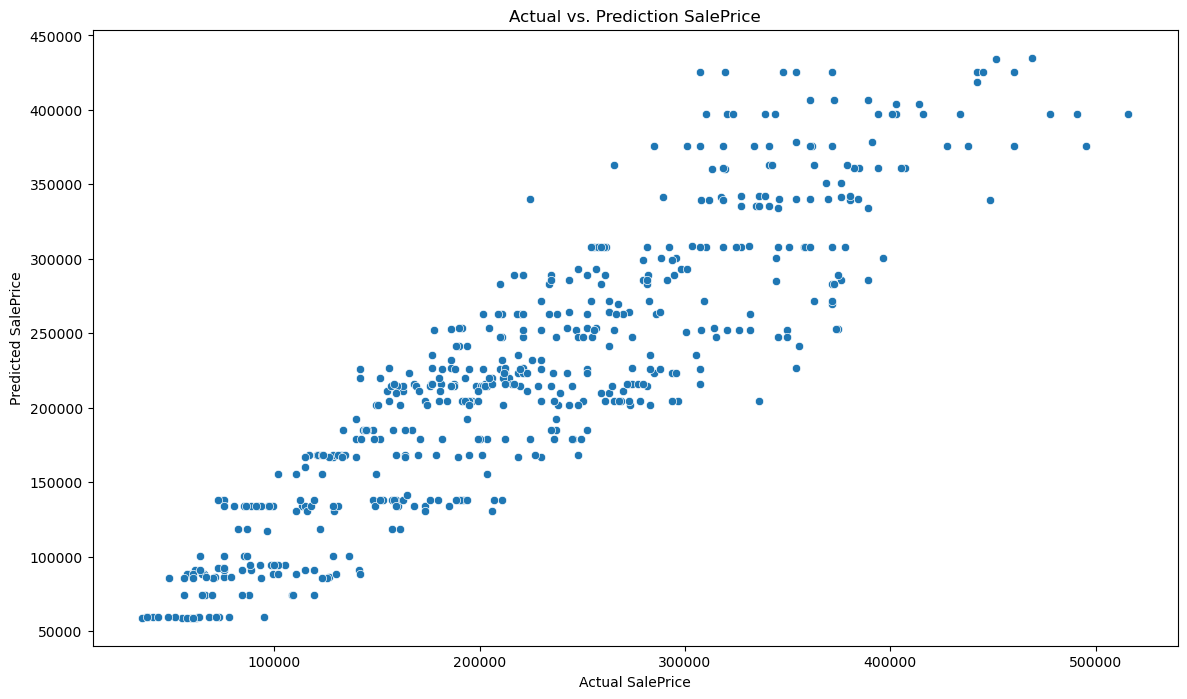

In [71]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction SalePrice', 
                                               xlabel='Actual SalePrice', 
                                               ylabel='Predicted SalePrice')
plt.show()

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

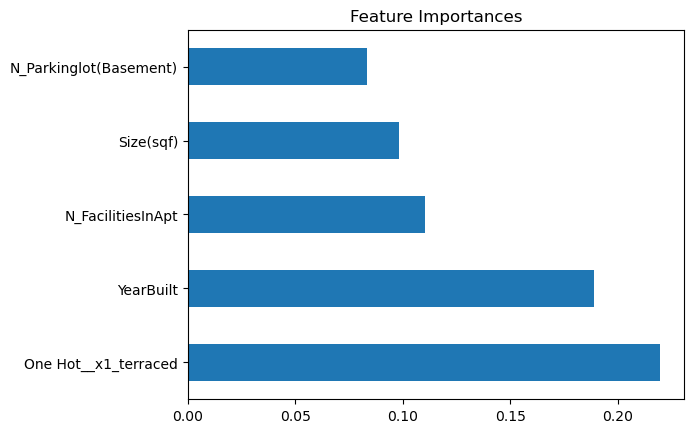

In [73]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');
plt.show()

***
### **5. CONCLUSION**

Kesimpulan yang didapatkan dari pemodelan regresi adalah terdapat 4 dari 10 fitur yang memiliki pengaruh erat terhadap SalePrice. Keempat fitur tersebut adalah HallwayType, N_Parkinglot(Basement), N_FacilitiesInApt, Size(sqf) dan YearBuilt.

1. Model mengalami pengurangan nilai RMSE sebesar
2. Nilai RMSE final model XGBoost Regressor setelah dilakukan sebesar ...
3. Dapat terjadi anomali dikarenakan fitur yang dikurangi dari dataset dan jumlah data latih yang kurang.

***
### **6. RECOMMENDATION**

Rekomendasi yang dapat dilakukan untuk mengembangkan model agar lebih lagi, antara lain :

1. Lakukan penambahan fitur yang lebih memiliki pengaruh terhadap target SalePrice. Dalam proses analisis data, terdapat beberapa fitur yang tidak digunakan dan mungkin memiliki hubungan dengan target.
<br><br>

2. Lakukan pengembangan dengan menggunakan algoritma yang lebih kompleks agar model dapat mengecilkan error.

****

In [85]:
#Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_Apartment.sav', 'wb'))

In [86]:
# Load model
filename = 'Model_Apartment.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [87]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

44909.53007394955